In [126]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [2]:
!pip install astroNN

     |████████████████████████████████| 9.3 MB 6.8 MB/s 
     |████████████████████████████████| 4.4 MB 52.7 MB/s 
     |████████████████████████████████| 802 kB 61.4 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 3.2 MB 41.3 MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-py3-none-any.whl size=9284594 sha256=921bc3c0df667376996ec647b386406e4a67ec31d3686d5abb13ee47cd37b172
  Stored in directory: /root/.cache/pip/wheels/26/a4/7e/4cbf2a7f9cd51929da9d09345e8cd37c647b54825a1314dd2d
  Created wheel for mimeparse: filename=mimeparse-0.1.3-py3-none-any.whl size=3864 sha256=254b839b6c5a739ba90c4a6425f1a98933b6b0ed769711f75a74a044bb30ed59
  Stored in directory: /root/.cache/pip/wheels/49/b4/2d/0081759ae1833bd694024801f7aacddcda8a687e8d5fbaeebd
Successfully built astroNN mimeparse


In [5]:
from astroNN.datasets import load_galaxy10

WARNING! APOGEE environment variable SDSS_LOCAL_SAS_MIRROR not set
WARNING! Gaia environment variable GAIA_TOOLS_DATA not set


In [6]:
images, labels = load_galaxy10()
print(labels)
label = utils.to_categorical(labels, 10)

Galaxy10.h5:  99%|█████████▊| 207M/210M [00:04<00:00, 51.4MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:05, 39.2MB/s]                           


[2 2 4 ... 2 9 2]


In [7]:
label = label.astype(np.float32)
images = images.astype(np.float32)

In [8]:
print (labels)
print (label.shape[0])

[2 2 4 ... 2 9 2]
21785


In [9]:
train_x, test_x = train_test_split(np.arange(labels.shape[0]), test_size = 0.1)
train_images, train_labels, test_images, test_labels = images[train_x], label[train_x], images[test_x], label[test_x]

In [10]:
print (len(train_x))
print (len(test_x))
print (len(train_labels))

19606
2179
19606


In [11]:
imageLabel = ["Distirbed", "Merging", "Round Smooth", "In-between Round Smooth", 
              "Cigar Shaped smooth", "Barred Spiral", "Unbarred tight spiral", "Unbared loose spiral", "Edge-on Galaxies without bulge",
              "Edge-on Galacies with Bulge"]

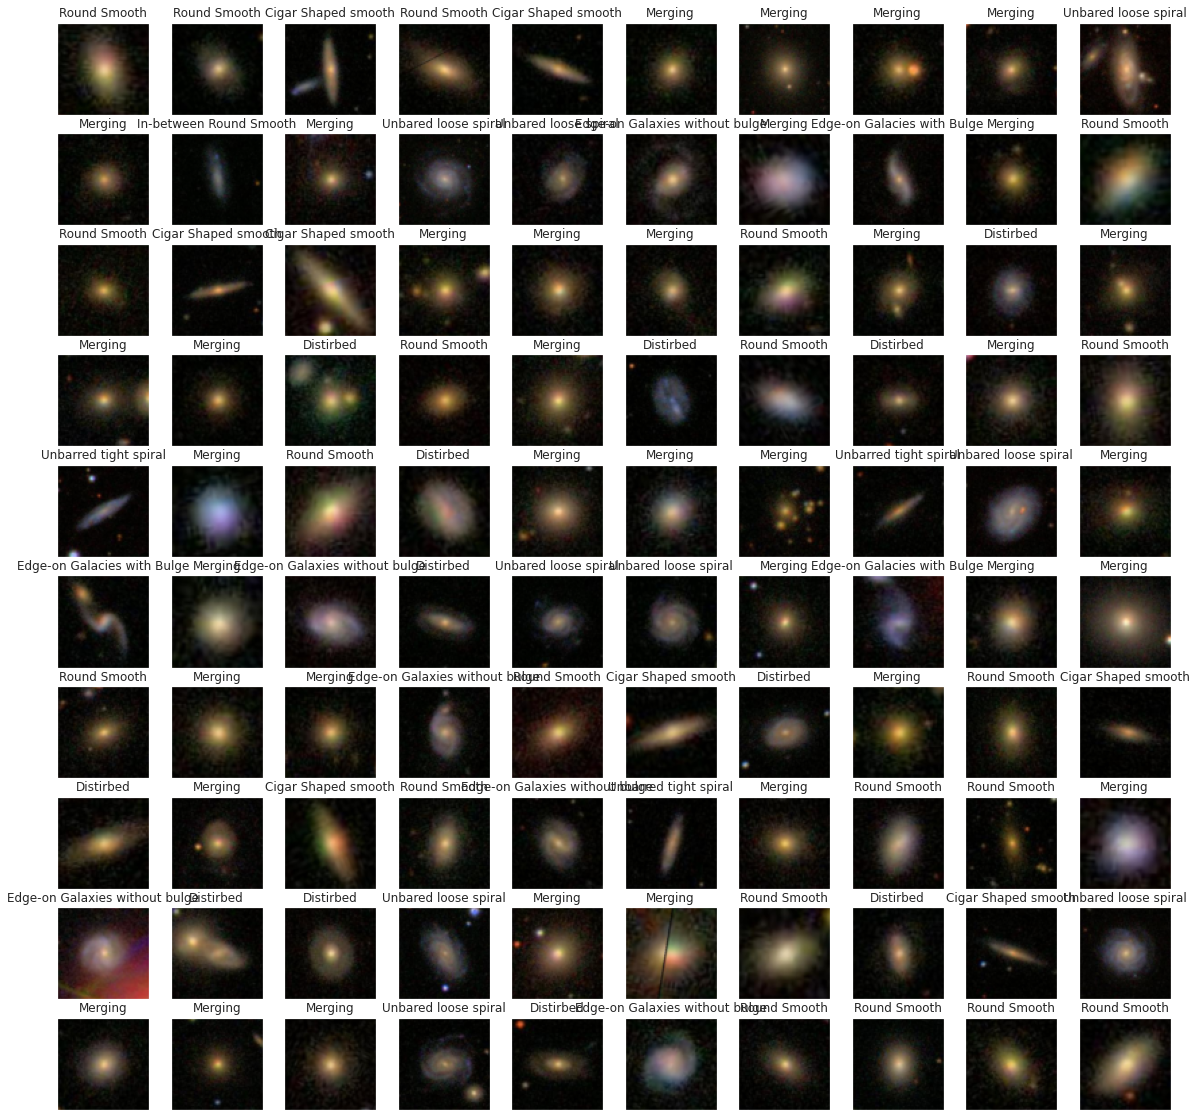

In [12]:
fig, axes = plt.subplots(ncols = 10, nrows = 10, figsize = (20,20))
index = 0
for i in range(10):
  for j in range(10):
    axes[i,j].set_title(imageLabel[labels[index]])
    axes[i,j].imshow(images[index].astype(np.uint8))
    axes[i,j].get_xaxis().set_visible(False)
    axes[i,j].get_yaxis().set_visible(False)
    index +=1
plt.show()


2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(19606, 69, 69, 3)


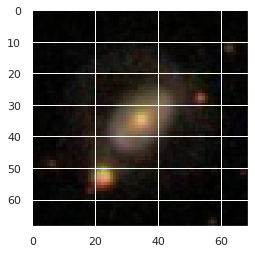

In [13]:
plt.imshow(train_images[0].astype(np.uint8))
print (labels[0])
print (label[0])
print (train_images.shape)

In [50]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

# Value normalization
X_train  = X_train/255
X_test  = X_test/255


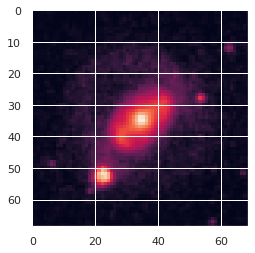

In [51]:
plt.imshow(X_train[0])

In [52]:
# Defining input shape for CNN
print(np.shape(X_train))

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

input_shape = (X_train.shape[1], X_train.shape[2], 1)

print(input_shape)

(19606, 69, 69)
(69, 69, 1)


In [53]:
print (X_train.shape)
print (train_labels.shape)
print (train_labels)

(19606, 69, 69, 1)
(19606, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [54]:
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,
                             zoom_range=0.2,
                             horizontal_flip=True,)

datagen.fit(X_train)

datagen.fit(X_test)

In [55]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='tanh', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(len(imageLabel), activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 69, 69, 16)        160       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 69, 69, 32)        4640      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 17, 17, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 32)         

In [56]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
batch_size=64
history = model.fit(X_train, train_labels, 
                    epochs=30, 
                    steps_per_epoch = int(np.ceil(X_train.shape[0]/ float(64))) , batch_size=32, validation_data=(X_test, test_labels), callbacks=[es])

Epoch 1/30
307/307 [==============================] - 5s 12ms/step - loss: 1.8202 - acc: 0.3092 - val_loss: 1.2672 - val_acc: 0.5163
Epoch 2/30
307/307 [==============================] - 3s 10ms/step - loss: 1.3493 - acc: 0.4665 - val_loss: 1.0511 - val_acc: 0.5874
Epoch 3/30
307/307 [==============================] - 3s 10ms/step - loss: 1.1020 - acc: 0.5931 - val_loss: 0.8788 - val_acc: 0.6700
Epoch 4/30
307/307 [==============================] - 3s 10ms/step - loss: 1.0108 - acc: 0.6403 - val_loss: 0.8230 - val_acc: 0.6962
Epoch 5/30
307/307 [==============================] - 3s 10ms/step - loss: 0.9330 - acc: 0.6584 - val_loss: 0.7675 - val_acc: 0.7159
Epoch 6/30
307/307 [==============================] - 3s 10ms/step - loss: 0.8904 - acc: 0.6764 - val_loss: 0.7274 - val_acc: 0.7380
Epoch 7/30
307/307 [==============================] - 3s 10ms/step - loss: 0.8072 - acc: 0.7136 - val_loss: 0.7761 - val_acc: 0.7136
Epoch 8/30
307/307 [==============================] - 3s 10ms/step - 

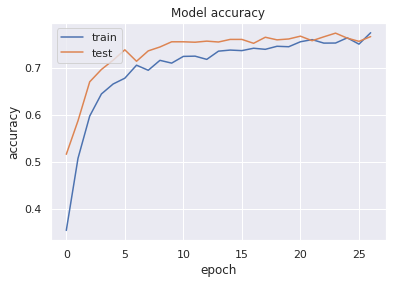

In [57]:
%matplotlib inline
fig = plt.gcf()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Accuracy.png')

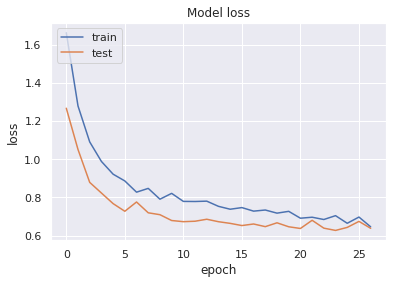

In [58]:
fig = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
fig.savefig('Model_Loss.png')

[[195  21  85   2   4   0   0  39  32  14]
 [ 37 644  46   0   0   0   0   1   0   0]
 [ 33  15 521   8   6   0   0   2   0   1]
 [  0   0   0   8   1   0   0   0   0   0]
 [  6   0   1  20 132   0  15   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8  12   1  54   0   0   2]
 [ 20   6   3   0   0   0   0  58   9   0]
 [ 21   0   1   0   0   0   0   9  46   7]
 [ 12   0   0   0   1   0   0   1   6  11]]


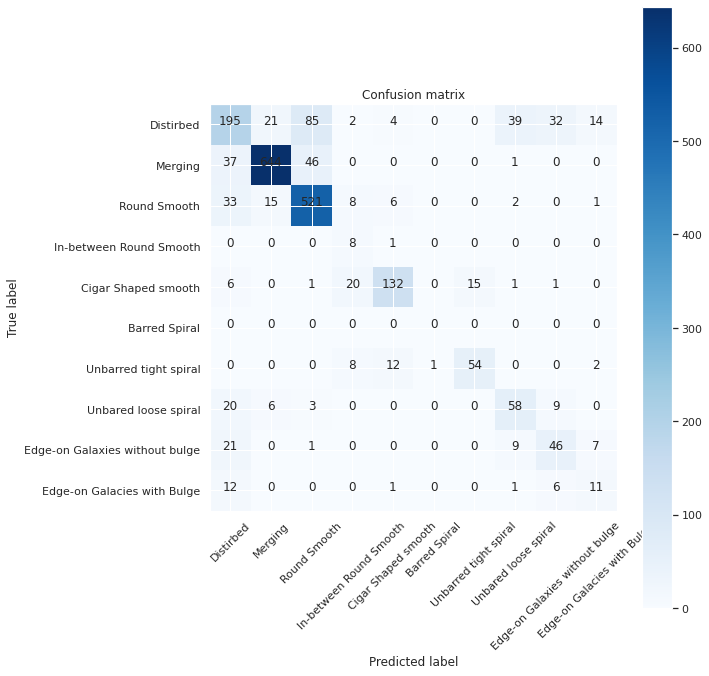

In [123]:
def plot_confusionM(cm, class_names):
    figure = plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

pred = model.predict(X_test)

pred_label = np.argmax(pred, axis=1)
actual_label = np.argmax(test_labels, axis=1)

cm = confusion_matrix(pred_label+1, actual_label+1)
print (cm)
plot_confusionM(cm, imageLabel)

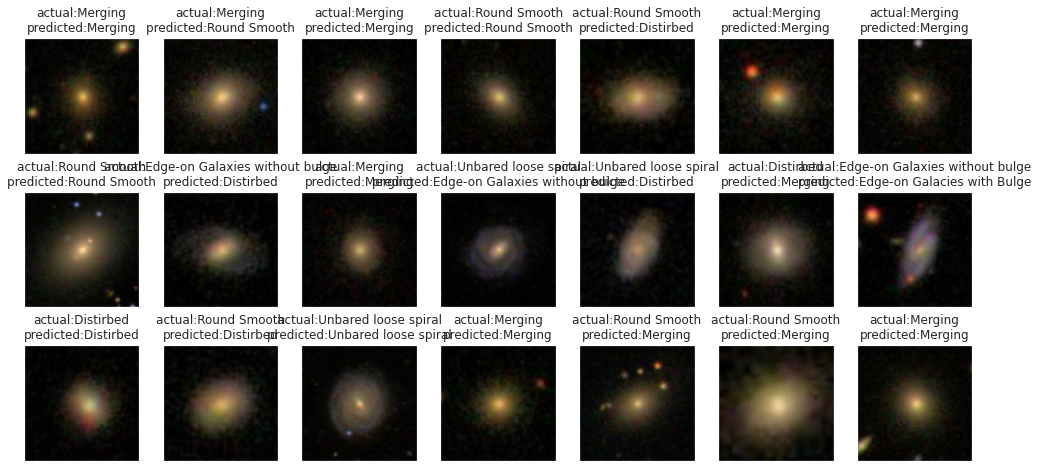

In [124]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + imageLabel[actual_label[index]] + '\n' 
                            + 'predicted:' + imageLabel[pred_label[index]])
        axes[i,j].imshow(test_images[index].astype(np.uint8), cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()